In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
os.chdir(r"C:\Users\mese4\Documents\The Data incubator\project\cord-19_2020-07-01\2020-07-01")
df=pd.read_csv('metadata.csv', encoding='ISO-8859-1')


C:\Users\mese4\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
rule = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')



C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [3]:

df1=df['source_x']
def preprint(a):

    if 'biorxiv' in a :
        return 'Preprint'
    elif 'medrxiv' in a:
        return 'Preprint'
    else:
        return 'PMC'
    
a=[preprint(n) for n in df1]

df_abs = pd.DataFrame(a,columns =['preprint'])  
df_abs
df['preprint']=df_abs
df_19=df[(df['publish_time'] > '2019-12-01')]

df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df_19['year'] = df['publish_time'].dt.year
df_19['month'] = df['publish_time'].dt.month

df_19 ['year_month']= df_19['year'].map(str) + '-' + df_19['month'].map(str)

C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

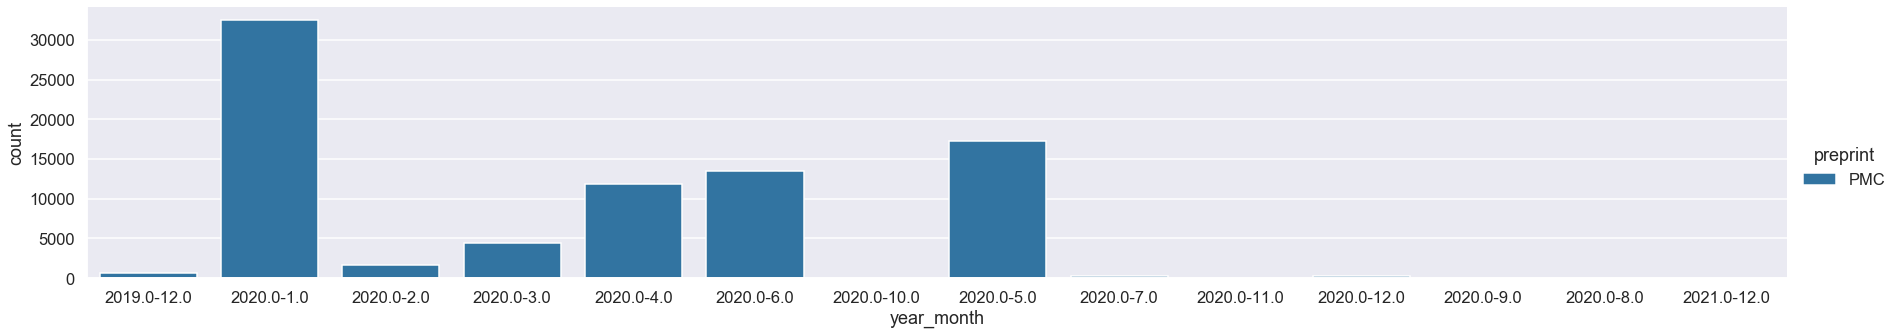

In [4]:
sns.set_context("talk")
sns.set_style('darkgrid')

g = sns.catplot(x="year_month", hue="preprint", 

                data=df_19, kind="count",

                height=5, aspect=5)

g.savefig("publications_years.png")

In [144]:


##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

In [9]:

nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
new_words = ["using", "show", 'covid','patient','disease','patients','treatment','viral','data','including','coronavirus','health','study',"result",'unknown','2555','method','infection','day','case','however','moreover','conclusion','virus','patient', "large", "also", "iv", "one",'nan', "two", "new", "previously", "shown",'recently','promising']
stop_words = stop_words.union(new_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mese4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
dataset=df_19

In [12]:
#text = dataset['abstract'].translate(string.maketrans(“”,””), string.punctuation)
import string
dataset['abstract_']=dataset['abstract'].str.replace('[{}]'.format(string.punctuation), '')
dataset['abstract_'] = dataset['abstract_'].astype(str)
corpus = []
for i in range(0, 3847):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['abstract_'].iloc[i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split() 
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

type(corpus)

C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


list

In [15]:
corpus[1000:]

['introduction many center child diabetic ketoacidosis dka receive care either endocrinology ward pediatric intensive care unit picu conducted quality improvement qi initiative reduce potentially avoidable picu admission child dka without increasing endocrinology wardtopicu transfer method survey provider demonstrated opportunity increase awareness institutional criterion picu admission child dka created electronic record ehr dotphrase prepopulated criterion placed note ehr dka reference provider ehrbased report created monitor disposition dka use dotphrase process measure primary outcome measure potentially avoidable picu admission dka endocrinology wardtopicu transfer tracked balancing measure ensure safe disposition result implementation dotphrase use variable averaged year percentage dka admission classified potentially avoidable picu stay decreased concurrent decrease total percentage picu admission dka percentage endocrinology wardtopicu transfer declined conclusion novel ehrbase

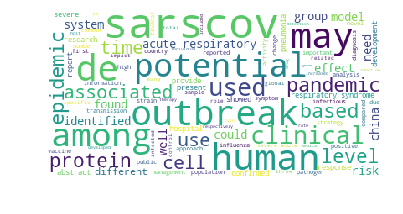

In [12]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

import re

cv=CountVectorizer(max_df=0.9,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

list(cv.vocabulary_.keys())[:10]

['feline',
 'kidney',
 'cell',
 'crfk',
 'line',
 'derived',
 'growth',
 'certain',
 'exists',
 'whether']

[Text(0, 0, 'case'),
 Text(0, 0, 'respiratory'),
 Text(0, 0, 'sarscov'),
 Text(0, 0, 'de'),
 Text(0, 0, 'clinical'),
 Text(0, 0, 'result'),
 Text(0, 0, 'cell'),
 Text(0, 0, 'severe'),
 Text(0, 0, 'abstract'),
 Text(0, 0, 'china'),
 Text(0, 0, 'outbreak'),
 Text(0, 0, 'care'),
 Text(0, 0, 'pandemic'),
 Text(0, 0, 'risk'),
 Text(0, 0, 'may'),
 Text(0, 0, 'human'),
 Text(0, 0, 'novel'),
 Text(0, 0, 'method'),
 Text(0, 0, 'protein'),
 Text(0, 0, 'epidemic')]

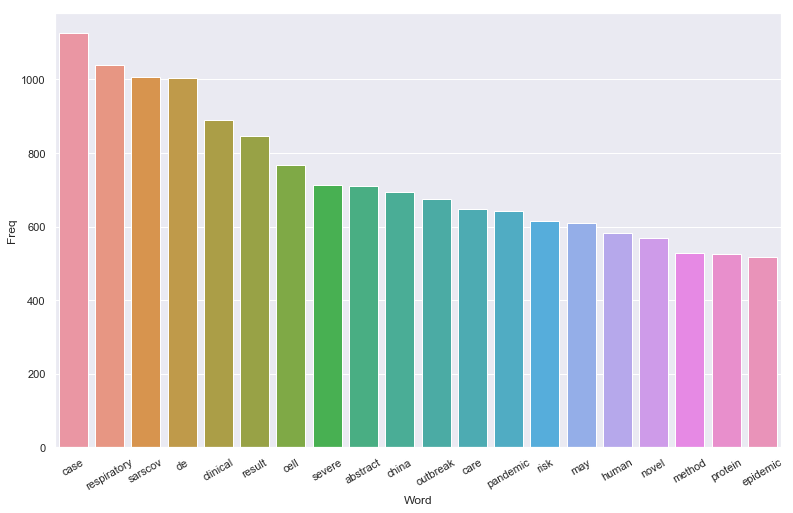

In [18]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

#top_df

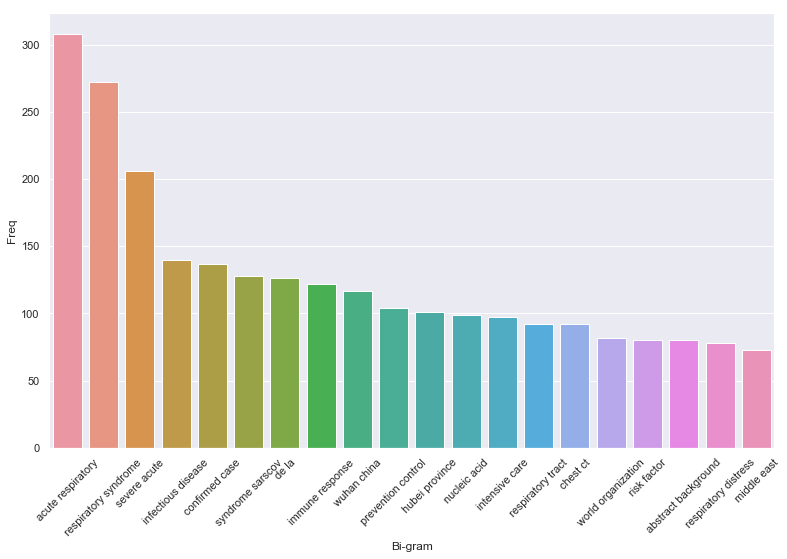

In [16]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
h.figure.savefig('most_two_frqu.png')


                         Tri-gram  Freq
0        severe acute respiratory   204
1      acute respiratory syndrome   191
2    respiratory syndrome sarscov   128
3         middle east respiratory    67
4             intensive care unit    67
5       east respiratory syndrome    64
6       polymerase chain reaction    59
7   respiratory distress syndrome    59
8      acute respiratory distress    59
9   personal protective equipment    43
10           hubei province china    42
11            play important role    36
12    respiratory tract infection    34
13           wuhan hubei province    33
14         confidence interval ci    31
15            caused severe acute    31
16   respiratory syndrome merscov    30
17        lower respiratory tract    30
18              nucleic acid test    30
19           ground glass opacity    26


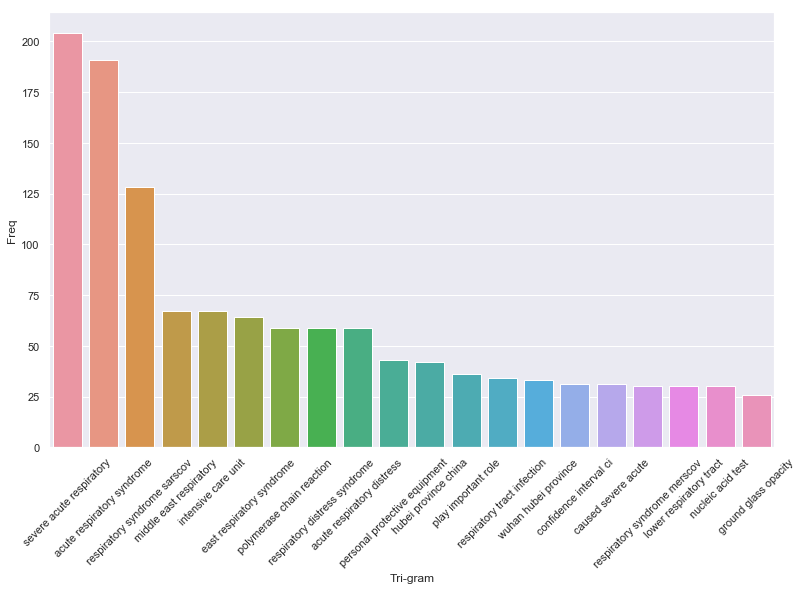

In [40]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
j.figure.savefig('most_three_frqu.png')


In [157]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[1]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [64]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
high percentage camel handler saudi arabia seropositive middle east respiratory syndrome found camel handler family member pakistan country extensive camel merscov seropositive indicating merscov population extends beyond arabian peninsula

Keywords:
camel 0.544
seropositive 0.41
merscov 0.26
pakistan 0.205
high percentage 0.195


In [4]:
import sys
!{sys.executable} -m pip install wordcloud

C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

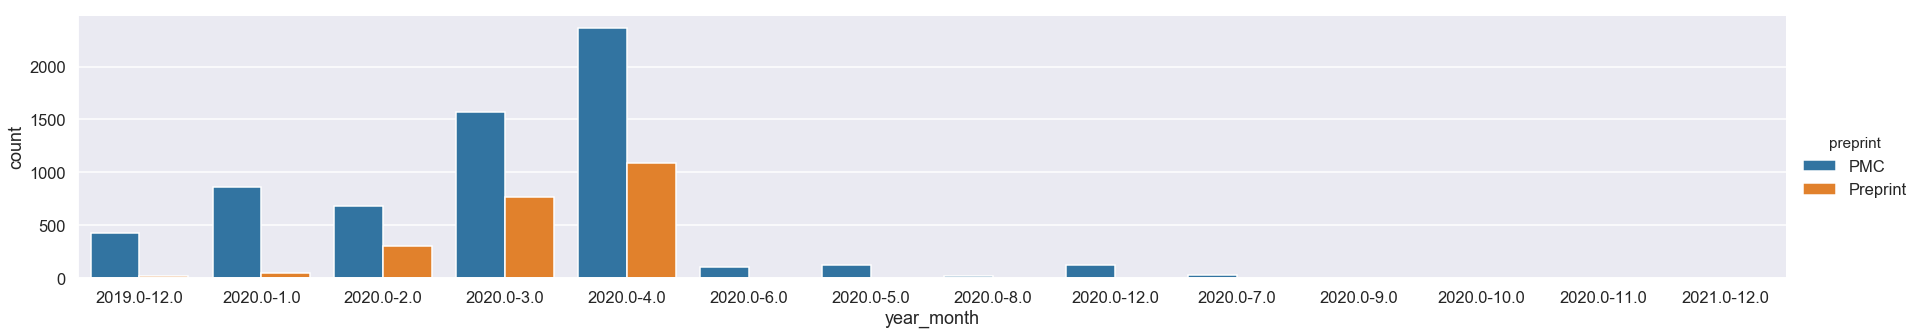

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
os.chdir(r"C:\Users\mese4\Desktop\Python DM\Data science challange\project")
df=pd.read_csv('metadata.csv', encoding='ISO-8859-1')

rule = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

#1st asset

df1=df['source_x']
def preprint(a):

    if 'biorxiv' in a :
        return 'Preprint'
    elif 'medrxiv' in a:
        return 'Preprint'
    else:
        return 'PMC'
    
a=[preprint(n) for n in df1]

df_abs = pd.DataFrame(a,columns =['preprint'])  
df_abs
df['preprint']=df_abs
df_19=df[(df['publish_time'] > '2019-12-01')]

df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df_19['year'] = df['publish_time'].dt.year
df_19['month'] = df['publish_time'].dt.month

df_19 ['year_month']= df_19['year'].map(str) + '-' + df_19['month'].map(str)

sns.set_context("talk")
sns.set_style('darkgrid')

g = sns.catplot(x="year_month", hue="preprint", 

                data=df_19, kind="count",

                height=5, aspect=5)

#2nd asset

['A1BG',
 'A1BG-AS1',
 'A1CF',
 'A2M',
 'A2M-AS1',
 'A2ML1',
 'A2ML1-AS1',
 'A2ML1-AS2',
 'A2MP1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AAAS',
 'AACS',
 'AACSP1',
 'AADAC',
 'AADACL2',
 'AADACL2-AS1',
 'AADACL3',
 'AADACL4',
 'AADACP1',
 'AADAT',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARD',
 'AARS1',
 'AARS1P1',
 'AARS2',
 'AARSD1',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATBC',
 'AATF',
 'AATK',
 'ABALON',
 'ABAT',
 'ABBA01000933.1',
 'ABBA01000935.2',
 'ABBA01006766.1',
 'ABBA01010928.1',
 'ABBA01031658.1',
 'ABBA01031669.1',
 'ABBA01037345.1',
 'ABBA01037348.1',
 'ABBA01045074.1',
 'ABBA01045074.2',
 'ABCA1',
 'ABCA10',
 'ABCA11P',
 'ABCA12',
 'ABCA13',
 'ABCA17P',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCA9-AS1',
 'ABCB1',
 'ABCB10',
 'ABCB10P1',
 'ABCB10P3',
 'ABCB10P4',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC13',
 'ABCC2',
 'ABCC3',
 'ABCC4',


In [16]:
df = pd.DataFrame(gene_names)
df

NameError: name 'gene_names' is not defined

In [2]:
import pyensembl
ensembl = pyensembl.EnsemblRelease(99)
ensembl
#import sys
#!{sys.executable} -m pip install pyensembl

#!pyensembl install --release 75 99 --species human


gene_names = ensembl.gene_names(contig=None, strand=None)#(contig=6, position=29945884)

len(gene_names)


60642